# Deep Learning with TensorFlow

![Namespace Logo](../labs.png)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('sales.csv')

In [3]:
df.head()

,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Price
0,561.985028,732.353911,617.229697,557.960379,433.822515,17626.615604
1,661.395572,448.089304,913.175553,986.790667,392.644115,22918.339944
2,810.726439,541.588398,581.677631,947.810958,72.740924,19844.766068
3,89.220403,20.703639,852.602722,796.832513,890.892440,14745.282522
4,1002.105182,818.338370,472.554867,799.261877,121.113012,15104.316428


In [4]:
X = df.drop(['Price'],axis=1)

In [5]:
y = df['Price']

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [8]:
from sklearn.preprocessing import MinMaxScaler

In [9]:
sc = MinMaxScaler()

In [10]:
X_train = sc.fit_transform(X_train)

In [11]:
X_test = sc.transform(X_test)

In [12]:
from tensorflow import keras
from tensorflow.keras.layers import Dense

In [13]:
model = keras.Sequential([
    
        Dense(5,activation='relu',input_dim=5),
        Dense(5,activation='relu'),
        Dense(1,activation=keras.activations.linear)
])


In [14]:
model.compile(optimizer='adam', loss='mean_squared_error',metrics=['mse'])

In [15]:
class CustomCallBack(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.metrics = []

    def on_batch_end(self, batch, logs={}):
        self.metrics.append(logs.get('mse'))

In [16]:
from tensorflow.keras.callbacks import EarlyStopping

In [17]:
custom_callback = CustomCallBack()

In [18]:
callbacks = [
            custom_callback,
            EarlyStopping(patience = 30,mode='min',monitor='val_loss')

            ]

In [19]:
history = model.fit(X_train,y_train,epochs=600,validation_split = 0.2,callbacks=callbacks)

Epoch 1/600
175/175 [==============================] - 1s 3ms/step - loss: 240260592.0000 - mse: 240260592.0000 - val_loss: 237767232.0000 - val_mse: 237767232.0000
Epoch 2/600
175/175 [==============================] - 0s 2ms/step - loss: 240125824.0000 - mse: 240125824.0000 - val_loss: 237539120.0000 - val_mse: 237539120.0000
Epoch 3/600
175/175 [==============================] - 0s 2ms/step - loss: 239711264.0000 - mse: 239711264.0000 - val_loss: 236862112.0000 - val_mse: 236862112.0000
Epoch 4/600
175/175 [==============================] - 0s 2ms/step - loss: 238652928.0000 - mse: 238652928.0000 - val_loss: 235429680.0000 - val_mse: 235429680.0000
Epoch 5/600
175/175 [==============================] - 0s 3ms/step - loss: 236773232.0000 - mse: 236773232.0000 - val_loss: 233127024.0000 - val_mse: 233127024.0000
Epoch 6/600
175/175 [==============================] - 0s 2ms/step - loss: 233949600.0000 - mse: 233949600.0000 - val_loss: 229832288.0000 - val_mse: 229832288.0000
Epoch 7/60

In [31]:
pd.DataFrame(custom_callback.metrics).head()

AttributeError: 'CustomCallBack' object has no attribute 'metrics'

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 5)                 30        
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 30        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 6         
Total params: 66
Trainable params: 66
Non-trainable params: 0
_________________________________________________________________


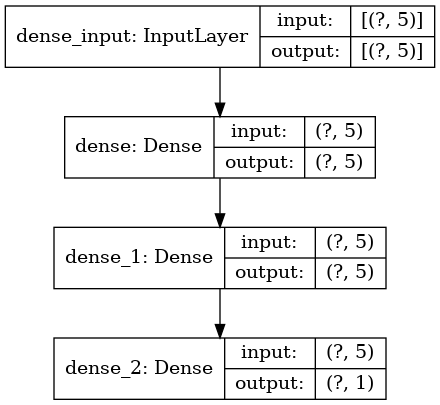

In [22]:
import tensorflow as tf
tf.keras.utils.plot_model(
    model,
    to_file="model.png",
    show_shapes=True,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=True,
    dpi=96,
)

In [23]:
from sklearn import metrics
import numpy as np

In [24]:
predictions = model.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 1884.2006166220606
MSE: 5999119.017622714
RMSE: 2449.309906406846


In [25]:
y_test.shape

(3000,)

In [26]:
predictions.shape

(3000, 1)

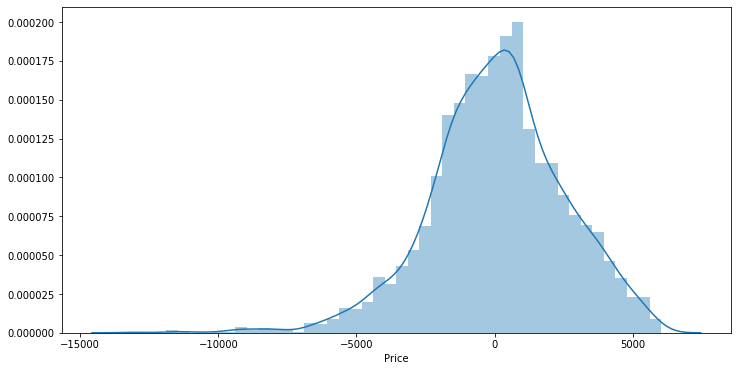

In [27]:
plt.figure(figsize=(12,6))
sns.distplot((y_test-predictions.reshape(3000,)));

In [28]:
losses = pd.DataFrame(history.history)

In [29]:
losses

,loss,mse,val_loss,val_mse
0,240260592.0,240260592.0,237767232.0,237767232.0
1,240125824.0,240125824.0,237539120.0,237539120.0
2,239711264.0,239711264.0,236862112.0,236862112.0
3,238652928.0,238652928.0,235429680.0,235429680.0
4,236773232.0,236773232.0,233127024.0,233127024.0
...,...,...,...,...
319,6288376.0,6288376.0,6174168.5,6174168.5
320,6287149.5,6287149.5,6174334.5,6174334.5
321,6287630.5,6287630.5,6174693.5,6174693.5
322,6290120.5,6290120.5,6174409.0,6174409.0


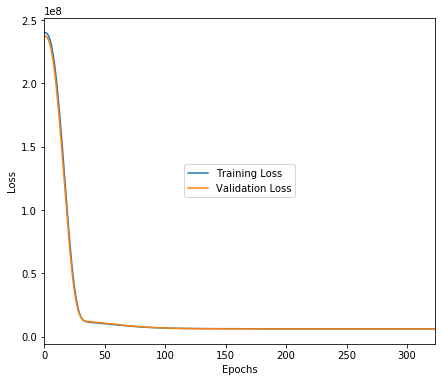

In [30]:
plt.figure(figsize=(7,6))
plt.xlabel('Epochs')
plt.ylabel('Loss')
losses['loss'].plot(label='Training Loss')
losses['val_loss'].plot(label='Validation Loss')
plt.legend(loc='center')

Happy Learning!